# PRCP-1024 Texas Salary Prediction Project
**Author**: [Your Name]  
**Date**: [Date]  

## 📌 Problem Statement
We will:
- Analyze Texas government employee salary data
- Build predictive models for payroll estimation
- Identify outliers and wage disparities
- Study salary trends over time
- Compare models and suggest the best

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid", palette="muted")

In [3]:
# Load CSV file extracted from the provided salary.zip link
data = pd.read_csv("salary.csv")  # Make sure the CSV is available locally
data.shape, data.columns

((149481, 21),
 Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
        'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
        'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
        'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
        'summed_annual_salary', 'hide_from_search'],
       dtype='object'))

In [4]:
data.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


In [5]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

AGENCY                          0
AGENCY NAME                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
CLASS CODE                      0
CLASS TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
EMPLOY DATE                     0
HRLY RATE                       0
HRS PER WK                      0
MONTHLY                         0
ANNUAL                          0
STATE NUMBER                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

In [6]:
data.describe()

,AGENCY,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,multiple_full_time_jobs,summed_annual_salary
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05,14.0,16.000000
mean,545.736288,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05,1.0,74303.955000
std,139.057691,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05,0.0,51925.944282
min,101.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00,1.0,18000.000000
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05,1.0,32962.500000
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05,1.0,48063.300000
75%,696.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06,1.0,123751.770000
max,930.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06,1.0,171383.400000


In [7]:
# Drop columns with too many NAs or irrelevant
drop_cols = ['MI', 'STATE NUMBER', 'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs', 'summed_annual_salary', 'hide_from_search']
data = data.drop(columns=drop_cols)

# Handle missing numeric values
data['HRLY RATE'] = data['HRLY RATE'].fillna(0)
data['MONTHLY'] = data['MONTHLY'].fillna(data['MONTHLY'].median())
data['ANNUAL'] = data['ANNUAL'].fillna(data['ANNUAL'].median())

# Parse Employ Date
data['EMPLOY DATE'] = pd.to_datetime(data['EMPLOY DATE'], errors='coerce')
data['Employ Year'] = data['EMPLOY DATE'].dt.year
data['Employ Month'] = data['EMPLOY DATE'].dt.month

# Handle missing dates
data['Employ Year'] = data['Employ Year'].fillna(data['Employ Year'].median())
data['Employ Month'] = data['Employ Month'].fillna(data['Employ Month'].median())

data.isnull().sum()

AGENCY          0
AGENCY NAME     0
LAST NAME       0
FIRST NAME      0
CLASS CODE      0
CLASS TITLE     0
ETHNICITY       0
GENDER          0
STATUS          0
EMPLOY DATE     0
HRLY RATE       0
HRS PER WK      0
MONTHLY         0
ANNUAL          0
Employ Year     0
Employ Month    0
dtype: int64

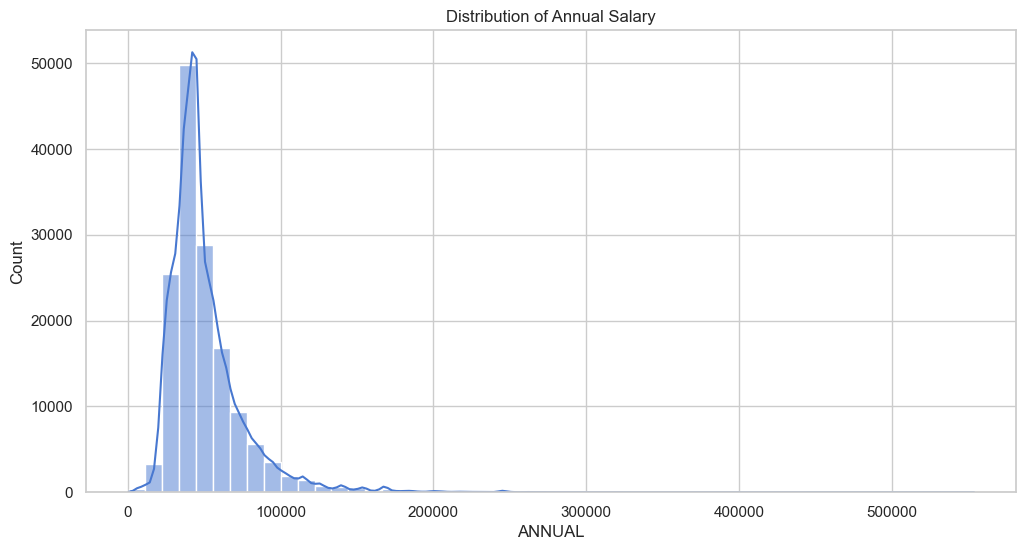

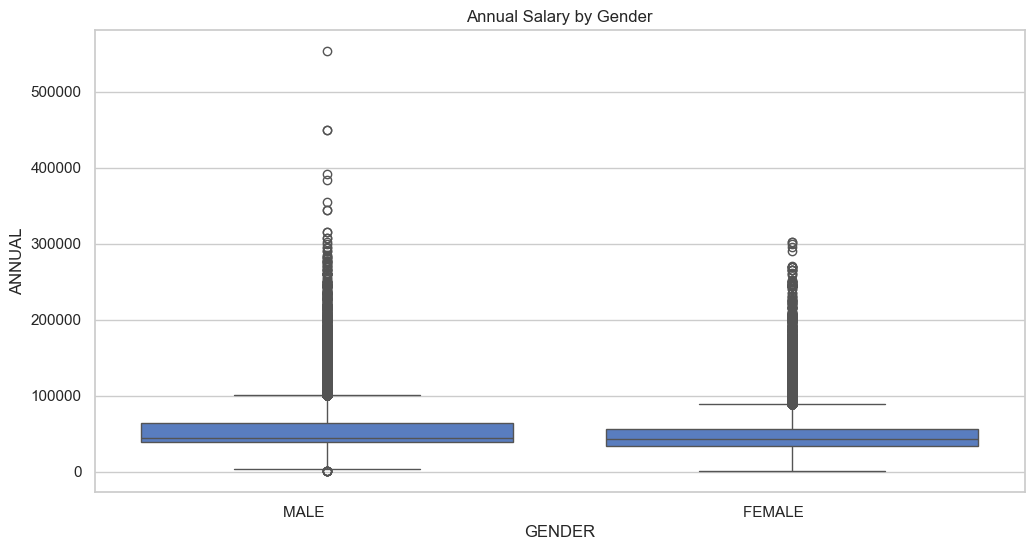

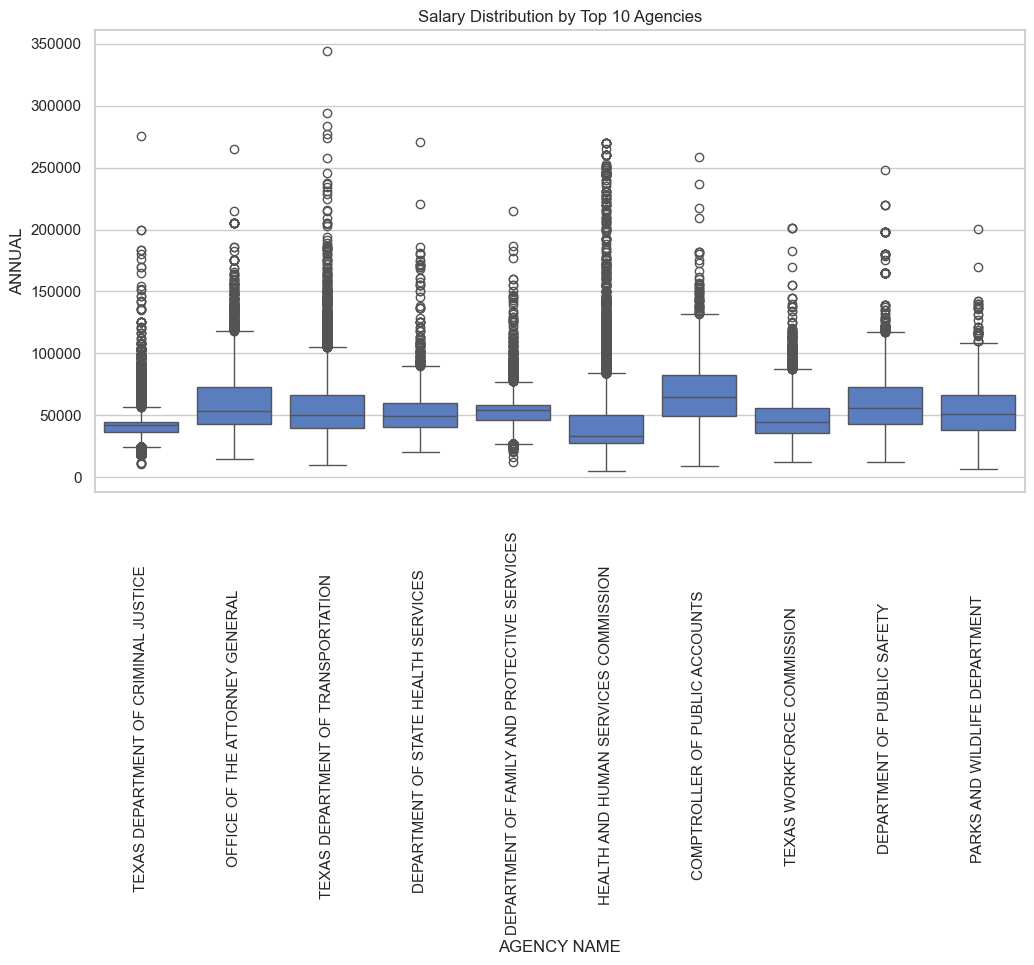

In [8]:
plt.figure(figsize=(12,6))
sns.histplot(data['ANNUAL'], bins=50, kde=True)
plt.title('Distribution of Annual Salary')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='GENDER', y='ANNUAL', data=data)
plt.title('Annual Salary by Gender')
plt.show()

plt.figure(figsize=(12,6))
top_agencies = data['AGENCY NAME'].value_counts().nlargest(10).index
sns.boxplot(x='AGENCY NAME', y='ANNUAL', data=data[data['AGENCY NAME'].isin(top_agencies)])
plt.xticks(rotation=90)
plt.title('Salary Distribution by Top 10 Agencies')
plt.show()

In [9]:
# Define outliers using IQR
Q1 = data['ANNUAL'].quantile(0.25)
Q3 = data['ANNUAL'].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (data['ANNUAL'] < (Q1 - 1.5 * IQR)) | (data['ANNUAL'] > (Q3 + 1.5 * IQR))
outliers = data[outlier_mask]

print(f"Number of outliers in salaries: {outliers.shape[0]}")
outliers[['FIRST NAME', 'LAST NAME', 'AGENCY NAME', 'ANNUAL']].head()

Number of outliers in salaries: 9031


,FIRST NAME,LAST NAME,AGENCY NAME,ANNUAL
0,MORTON,RUCKER,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",114549.84
2,JOHN,SPECIA JR,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",114549.84
5,SHAUNA,ROGERS,OFFICE OF THE ATTORNEY GENERAL ...,154788.00
7,DARREL,SPINKS,TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL ...,120000.00
36,ANNA,BARNETT,SENATE ...,96000.00


In [10]:
# Flag roles as Manager / Non-Manager
data['ManagerFlag'] = data['CLASS TITLE'].str.contains('Manager', case=False, na=False).astype(int)

manager_salaries = data[data['ManagerFlag']==1].groupby('AGENCY NAME')['ANNUAL'].median()
employee_salaries = data[data['ManagerFlag']==0].groupby('AGENCY NAME')['ANNUAL'].median()

disparity = (manager_salaries - employee_salaries).sort_values(ascending=False)
disparity = disparity.dropna()

disparity.head(10)

AGENCY NAME
CANCER PREVENTION AND RESEARCH INSTITUTE OF TEXAS     141046.50
TEACHER RETIREMENT SYSTEM                             122582.76
DEPARTMENT OF HOUSING AND COMMUNITY AFFAIRS            92838.00
EMPLOYEES RETIREMENT SYSTEM                            85259.70
TREASURY SAFEKEEPING TRUST COMPANY                     74009.04
TEXAS EDUCATION AGENCY                                 64568.46
SECRETARY OF STATE                                     54168.60
STATE PRESERVATION BOARD                               52743.30
TEXAS BOARD OF PROFESSIONAL ENGINEERS                  51117.60
HEALTH AND HUMAN SERVICES COMMISSION                   50667.60
Name: ANNUAL, dtype: float64

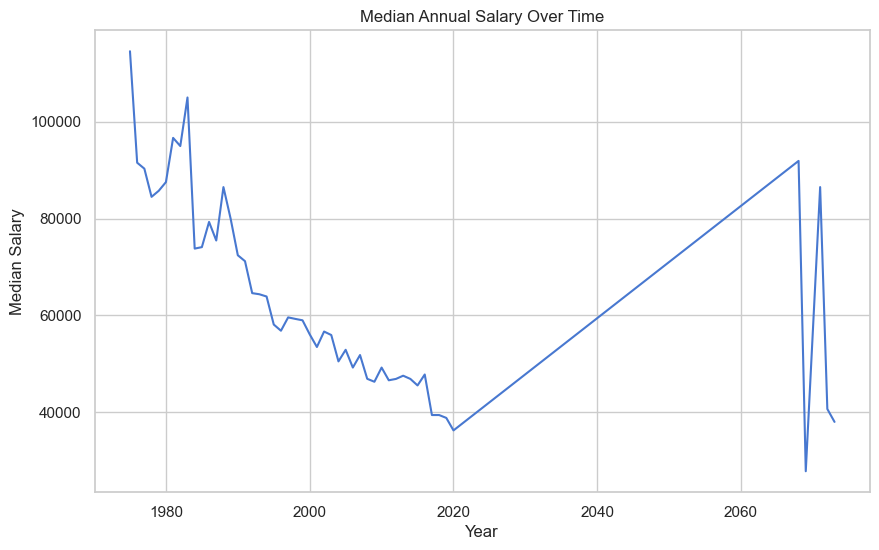

In [11]:
# Trend over years
yearly_salary = data.groupby('Employ Year')['ANNUAL'].median()

plt.figure(figsize=(10,6))
sns.lineplot(x=yearly_salary.index, y=yearly_salary.values)
plt.title('Median Annual Salary Over Time')
plt.xlabel('Year')
plt.ylabel('Median Salary')
plt.show()

In [12]:
features = ['AGENCY NAME', 'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'HRLY RATE', 'HRS PER WK', 'Employ Year', 'Employ Month']
target = 'ANNUAL'

X = data[features]
y = data[target]

# Label encoding for simplicity
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42)
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}
pd.DataFrame(results).T

,MAE,RMSE,R2
LinearRegression,14736.631639,22846.109555,0.187384
RandomForest,2946.989659,7169.488091,0.919973
GradientBoosting,8763.516211,14873.309027,0.655590


In [15]:
for name, model in models.items():
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=5)
    print(f"{name} Mean CV MAE: {-scores.mean():.2f}")

LinearRegression Mean CV MAE: 16276.88
RandomForest Mean CV MAE: 6816.98
GradientBoosting Mean CV MAE: 11582.03


In [16]:
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X, y)
print("✅ Random Forest chosen for production deployment.")

✅ Random Forest chosen for production deployment.


## 📌 Challenges Faced and Solutions
1. **Missing Values** – handled using median/zero
2. **Categorical Encoding** – label encoding for efficiency
3. **Outliers** – identified using IQR
4. **Feature Explosion** – avoided one-hot encoding for large categories
5. **Model Selection** – compared multiple regressors with metrics